In [ ]:
import numpy as np
import pandas as pd
import warnings
import re
import random
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
cj = pd.read_excel('/content/data_for_rcode.xlsx')

In [ ]:
cj.head()

,MCF Channel Grouping Path,Conversion,Null_Con,Conversion Value
0,Direct > Organic Search,3,119,301.43
1,Direct > Direct,5,114,298.98
2,Direct > Direct > Direct,2,33,69.62
3,Direct > Referral,16,17,584.73
4,Direct > Direct > Direct > Direct,1,26,30.59


In [ ]:
cj.rename(columns = {'MCF Channel Grouping Path':'path'}, inplace = True)

In [ ]:
cj['path']=['Start > ']+ cj['path']

In [ ]:
cj_con=cj[['path','Conversion']]
cj_con

,path,Conversion
0,Start > Direct > Organic Search,3
1,Start > Direct > Direct,5
2,Start > Direct > Direct > Direct,2
3,Start > Direct > Referral,16
4,Start > Direct > Direct > Direct > Direct,1
...,...,...
133,Start > Direct,32
134,Start > Organic Search,3
135,Start > Paid Search,0
136,Start > Referral,5


In [ ]:
cj_con= cj_con[cj_con['Conversion'] != 0]
cj_con

,path,Conversion
0,Start > Direct > Organic Search,3
1,Start > Direct > Direct,5
2,Start > Direct > Direct > Direct,2
3,Start > Direct > Referral,16
4,Start > Direct > Direct > Direct > Direct,1
15,Start > Direct > Direct > Referral,4
21,Start > Direct > Organic Search > Direct > Dir...,1
23,Start > Organic Search > Direct > Direct > Ref...,2
24,Start > Organic Search > Referral,2
28,Start > Direct > Direct > Organic Search > Dir...,1


In [ ]:
cj_con['path']= cj_con['path']+[' > Conversion']
cj_con

,path,Conversion
0,Start > Direct > Organic Search > Conversion,3
1,Start > Direct > Direct > Conversion,5
2,Start > Direct > Direct > Direct > Conversion,2
3,Start > Direct > Referral > Conversion,16
4,Start > Direct > Direct > Direct > Direct > Co...,1
15,Start > Direct > Direct > Referral > Conversion,4
21,Start > Direct > Organic Search > Direct > Dir...,1
23,Start > Organic Search > Direct > Direct > Ref...,2
24,Start > Organic Search > Referral > Conversion,2
28,Start > Direct > Direct > Organic Search > Dir...,1


In [ ]:
cj_con['Null_Con']=0
cj_con


,path,Conversion,Null_Con
0,Start > Direct > Organic Search > Conversion,3,0
1,Start > Direct > Direct > Conversion,5,0
2,Start > Direct > Direct > Direct > Conversion,2,0
3,Start > Direct > Referral > Conversion,16,0
4,Start > Direct > Direct > Direct > Direct > Co...,1,0
15,Start > Direct > Direct > Referral > Conversion,4,0
21,Start > Direct > Organic Search > Direct > Dir...,1,0
23,Start > Organic Search > Direct > Direct > Ref...,2,0
24,Start > Organic Search > Referral > Conversion,2,0
28,Start > Direct > Direct > Organic Search > Dir...,1,0


In [ ]:
cj_con.tail()

,path,Conversion,Null_Con
40,Start > Direct > Direct > Organic Search > Ref...,1,0
47,Start > Direct > Organic Search > Referral > C...,1,0
133,Start > Direct > Conversion,32,0
134,Start > Organic Search > Conversion,3,0
136,Start > Referral > Conversion,5,0


In [ ]:
cj_null=cj[['path','Null_Con']]
cj_null

,path,Null_Con
0,Start > Direct > Organic Search,119
1,Start > Direct > Direct,114
2,Start > Direct > Direct > Direct,33
3,Start > Direct > Referral,17
4,Start > Direct > Direct > Direct > Direct,26
...,...,...
133,Start > Direct,724
134,Start > Organic Search,401
135,Start > Paid Search,194
136,Start > Referral,7


In [ ]:
cj_null['path']= cj_null['path']+[' > Null']
cj_null

,path,Null_Con
0,Start > Direct > Organic Search > Null,119
1,Start > Direct > Direct > Null,114
2,Start > Direct > Direct > Direct > Null,33
3,Start > Direct > Referral > Null,17
4,Start > Direct > Direct > Direct > Direct > Null,26
...,...,...
133,Start > Direct > Null,724
134,Start > Organic Search > Null,401
135,Start > Paid Search > Null,194
136,Start > Referral > Null,7


In [ ]:
cj_null['Conversion']=0
cj_null

,path,Null_Con,Conversion
0,Start > Direct > Organic Search > Null,119,0
1,Start > Direct > Direct > Null,114,0
2,Start > Direct > Direct > Direct > Null,33,0
3,Start > Direct > Referral > Null,17,0
4,Start > Direct > Direct > Direct > Direct > Null,26,0
...,...,...,...
133,Start > Direct > Null,724,0
134,Start > Organic Search > Null,401,0
135,Start > Paid Search > Null,194,0
136,Start > Referral > Null,7,0


In [ ]:
cj_null.tail()

,path,Null_Con,Conversion
133,Start > Direct > Null,724,0
134,Start > Organic Search > Null,401,0
135,Start > Paid Search > Null,194,0
136,Start > Referral > Null,7,0
137,Start > Social Network > Null,2,0


In [ ]:
swap_list = ["path","Conversion","Null_Con"]

In [ ]:
cj_null = cj_null.reindex(columns=swap_list)
cj_null

,path,Conversion,Null_Con
0,Start > Direct > Organic Search > Null,0,119
1,Start > Direct > Direct > Null,0,114
2,Start > Direct > Direct > Direct > Null,0,33
3,Start > Direct > Referral > Null,0,17
4,Start > Direct > Direct > Direct > Direct > Null,0,26
...,...,...,...
133,Start > Direct > Null,0,724
134,Start > Organic Search > Null,0,401
135,Start > Paid Search > Null,0,194
136,Start > Referral > Null,0,7


In [ ]:
# concat dataframes
cj=pd.concat([cj_con,cj_null], axis=0, ignore_index=True)

In [ ]:
cj

,path,Conversion,Null_Con
0,Start > Direct > Organic Search > Conversion,3,0
1,Start > Direct > Direct > Conversion,5,0
2,Start > Direct > Direct > Direct > Conversion,2,0
3,Start > Direct > Referral > Conversion,16,0
4,Start > Direct > Direct > Direct > Direct > Co...,1,0
...,...,...,...
150,Start > Direct > Null,0,724
151,Start > Organic Search > Null,0,401
152,Start > Paid Search > Null,0,194
153,Start > Referral > Null,0,7


In [ ]:
def strip_repeat_channels(df, path = 'path'):
    df = df.copy()
    
    #Get all channel names
    all_chnl = []
    for p in df[path]:
        all_chnl.extend(p.split(' > '))
    
    #Get all unique channels
    all_chnl_unique = list(set(all_chnl))
    
    #Strip consecutive repeats
    for chnl in set(all_chnl):
        df.path =  [re.sub("(> "+chnl+" )+", "> "+chnl+" ", p) for p in df[path]]
        
    return df

In [ ]:
strip_paths=strip_repeat_channels(cj, path = 'path')

In [ ]:
strip_paths

,path,Conversion,Null_Con
0,Start > Direct > Organic Search > Conversion,3,0
1,Start > Direct > Conversion,5,0
2,Start > Direct > Conversion,2,0
3,Start > Direct > Referral > Conversion,16,0
4,Start > Direct > Conversion,1,0
...,...,...,...
150,Start > Direct > Null,0,724
151,Start > Organic Search > Null,0,401
152,Start > Paid Search > Null,0,194
153,Start > Referral > Null,0,7


In [ ]:
strip_paths.tail()

,path,Conversion,Null_Con
150,Start > Direct > Null,0,724
151,Start > Organic Search > Null,0,401
152,Start > Paid Search > Null,0,194
153,Start > Referral > Null,0,7
154,Start > Social Network > Null,0,2


In [ ]:
strip_paths['All_visits']=strip_paths['Conversion']+strip_paths['Null_Con']

In [ ]:
st_dir=sum(strip_paths.path.str.count("Start > Direct")*strip_paths['All_visits'])
st_os=sum(strip_paths.path.str.count("Start > Organic Search")*strip_paths['All_visits'])
st_ps=sum(strip_paths.path.str.count("Start > Paid Search")*strip_paths['All_visits'])
st_ref=sum(strip_paths.path.str.count("Start > Referral")*strip_paths['All_visits'])
st_s=sum(strip_paths.path.str.count("Start > Social Network")*strip_paths['All_visits'])
st_st=0; st_con=0; st_null=0

In [ ]:
#st_sum=st_dir+st_os+st_ps+st_ref+st_s
states=['Start','Direct','Organic Search','Paid Search','Referral','Social Network','Conversion','Null']

In [ ]:
#probabilities start
#st_list=[st_dir,st_os,st_ref,st_ps,st_s]
st_list=[st_st,st_dir,st_os,st_ps,st_ref,st_s,st_con,st_null]
st_prob=[x/sum(st_list) for x in st_list]
st_prob

[0.0,
 0.6584645669291339,
 0.22096456692913385,
 0.11023622047244094,
 0.009350393700787402,
 0.000984251968503937,
 0.0,
 0.0]

In [ ]:
dir_os=sum(strip_paths.path.str.count("Direct > Organic Search")*strip_paths['All_visits'])
dir_ps=sum(strip_paths.path.str.count("Direct > Paid Search")*strip_paths['All_visits'])
dir_ref=sum(strip_paths.path.str.count("Direct > Referral")*strip_paths['All_visits'])
dir_s=sum(strip_paths.path.str.count("Direct > Social Network")*strip_paths['All_visits'])
dir_con=sum(strip_paths.path.str.count("Direct > Conversion")*strip_paths['Conversion'])
dir_null=sum(strip_paths.path.str.count("Direct > Null")*strip_paths['Null_Con'])
dir_dir=0; dir_st=0

In [ ]:
#dir_sum=dir_os+dir_ps+dir_ref+dir_s+dir_con+dir_null

In [ ]:
#probabilities 1
#dir_list=[dir_con,dir_null,0,0,dir_os,dir_ref,dir_ps,dir_s]
dir_list=[dir_st,dir_dir,dir_os,dir_ps,dir_ref,dir_s,dir_con,dir_null]
dir_prob=[x/sum(dir_list) for x in dir_list]
dir_prob

[0.0,
 0.0,
 0.1743002544529262,
 0.009541984732824428,
 0.05216284987277354,
 0.0006361323155216285,
 0.027989821882951654,
 0.7353689567430025]

In [ ]:
os_dir=sum(strip_paths.path.str.count("Organic Search > Direct")*strip_paths['All_visits'])
os_ps=sum(strip_paths.path.str.count("Organic Search > Paid Search")*strip_paths['All_visits'])
os_ref=sum(strip_paths.path.str.count("Organic Search > Referral")*strip_paths['All_visits'])
os_s=sum(strip_paths.path.str.count("Organic Search > Social Network")*strip_paths['All_visits'])
os_con=sum(strip_paths.path.str.count("Organic Search > Conversion")*strip_paths['Conversion'])
os_null=sum(strip_paths.path.str.count("Organic Search > Null")*strip_paths['Null_Con'])
os_os=0; os_st=0

In [ ]:
#os_sum=os_dir+os_ps+os_ref+os_con+os_null

In [ ]:
#probabilities 2
#os_list=[os_con,os_null,0,os_dir,0,os_ref,os_ps,0]
os_list=[os_st,os_dir,os_os,os_ps,os_ref,os_s,os_con,os_null]
os_prob=[x/sum(os_list) for x in os_list]
os_prob

[0.0,
 0.24242424242424243,
 0.0,
 0.0,
 0.011019283746556474,
 0.0,
 0.008264462809917356,
 0.7382920110192838]

In [ ]:
ref_dir=sum(strip_paths.path.str.count("Referral > Direct")*strip_paths['All_visits'])
ref_os=sum(strip_paths.path.str.count("Referral > Organic Search")*strip_paths['All_visits'])
ref_ps=sum(strip_paths.path.str.count("Referral > Paid Search")*strip_paths['All_visits'])
ref_s=sum(strip_paths.path.str.count("Referral > Social Network")*strip_paths['All_visits'])
ref_con=sum(strip_paths.path.str.count("Referral > Conversion")*strip_paths['Conversion'])
ref_null=sum(strip_paths.path.str.count("Referral > Null")*strip_paths['Null_Con'])
ref_ref=0; ref_st=0

In [ ]:
#ref_sum=ref_dir+ref_os+ref_ps+ref_con+ref_null

In [ ]:
#probabilities 3
ref_list=[ref_st,ref_dir,ref_os,ref_ps,ref_ref,ref_s,ref_con,ref_null]
ref_prob=[x/sum(ref_list) for x in ref_list]
ref_prob

[0.0,
 0.3486238532110092,
 0.027522935779816515,
 0.0,
 0.0,
 0.0,
 0.28440366972477066,
 0.3394495412844037]

In [ ]:
ps_dir=sum(strip_paths.path.str.count("Paid Search > Direct")*strip_paths['All_visits'])
ps_os=sum(strip_paths.path.str.count("Paid Search > Organic Search")*strip_paths['All_visits'])
ps_ref=sum(strip_paths.path.str.count("Paid Search > Referral")*strip_paths['All_visits'])
ps_s=sum(strip_paths.path.str.count("Paid Search > Social Network")*strip_paths['All_visits'])
ps_con=sum(strip_paths.path.str.count("Paid Search > Conversion")*strip_paths['Conversion'])
ps_null=sum(strip_paths.path.str.count("Paid Search > Null")*strip_paths['Null_Con'])
ps_ps=0; ps_st=0

In [ ]:
#ps_sum=ps_dir+ps_os+ps_ref+ps_con+ps_null

In [ ]:
#probabilities 4
#ps_list=[ps_con,ps_null,0,ps_dir,ps_os,ps_ref,0,0]
ps_list=[ps_st,ps_dir,ps_os,ps_ps,ps_ref,ps_s,ps_con,ps_null]
ps_prob=[x/sum(ps_list) for x in ps_list]
ps_prob

[0.0, 0.08368200836820083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9163179916317992]

In [ ]:
s_dir=sum(strip_paths.path.str.count("Social Network > Direct")*strip_paths['All_visits'])
s_ps=sum(strip_paths.path.str.count("Social Network > Paid Search")*strip_paths['All_visits'])
s_os=sum(strip_paths.path.str.count("Social Network > Organic Search")*strip_paths['All_visits'])
s_ref=sum(strip_paths.path.str.count("Social Network > Referral")*strip_paths['All_visits'])
s_con=sum(strip_paths.path.str.count("Social Network > Conversion")*strip_paths['Conversion'])
s_null=sum(strip_paths.path.str.count("Social Network > Null")*strip_paths['Null_Con'])
s_st=0; s_s=0;

In [ ]:
#s_sum=s_dir+s_ps+s_os+s_ref+s_con+s_null

In [ ]:
#probabilities 5
#s_list=[s_dir,s_ps,s_os,s_ref,s_con,s_null]
s_list=[s_st,s_dir,s_os,s_ps,s_ref,s_s,s_con,s_null]
s_prob=[x/sum(s_list) for x in s_list]
s_prob

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

#Building the TPM

In [ ]:
con_prob=list(np.zeros(8))
con_prob[6]=1
con_prob

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0]

In [ ]:
null_prob=list(np.zeros(8))
null_prob[7]=1
null_prob

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1]

In [ ]:
#Final TPM
TPM=[st_prob,dir_prob,os_prob,ps_prob,ref_prob,s_prob,con_prob,null_prob]
TPM

[[0.0,
  0.6584645669291339,
  0.22096456692913385,
  0.11023622047244094,
  0.009350393700787402,
  0.000984251968503937,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.1743002544529262,
  0.009541984732824428,
  0.05216284987277354,
  0.0006361323155216285,
  0.027989821882951654,
  0.7353689567430025],
 [0.0,
  0.24242424242424243,
  0.0,
  0.0,
  0.011019283746556474,
  0.0,
  0.008264462809917356,
  0.7382920110192838],
 [0.0, 0.08368200836820083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9163179916317992],
 [0.0,
  0.3486238532110092,
  0.027522935779816515,
  0.0,
  0.0,
  0.0,
  0.28440366972477066,
  0.3394495412844037],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1]]

In [ ]:
TPM_df=pd.DataFrame(TPM)
TPM_df.columns=states
TPM_df.index=states
TPM_df

,Start,Direct,Organic Search,Paid Search,Referral,Social Network,Conversion,Null
Start,0.0,0.658465,0.220965,0.110236,0.009350,0.000984,0.000000,0.000000
Direct,0.0,0.000000,0.174300,0.009542,0.052163,0.000636,0.027990,0.735369
Organic Search,0.0,0.242424,0.000000,0.000000,0.011019,0.000000,0.008264,0.738292
Paid Search,0.0,0.083682,0.000000,0.000000,0.000000,0.000000,0.000000,0.916318
Referral,0.0,0.348624,0.027523,0.000000,0.000000,0.000000,0.284404,0.339450
Social Network,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Conversion,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Null,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
pi_0=pd.DataFrame(TPM_df.loc['Start'])
pi_0=np.transpose(pi_0)
pi_0

,Start,Direct,Organic Search,Paid Search,Referral,Social Network,Conversion,Null
Start,0.0,0.658465,0.220965,0.110236,0.00935,0.000984,0.0,0.0


In [ ]:
states_r=['Conversion','Null','Start','Direct','Organic Search','Referral','Paid Search','Social Network']
states_r

['Conversion',
 'Null',
 'Start',
 'Direct',
 'Organic Search',
 'Referral',
 'Paid Search',
 'Social Network']

In [ ]:
#Rearranging Columns
TPM_df1=pd.DataFrame(TPM_df,columns=states_r)
TPM_df1

,Conversion,Null,Start,Direct,Organic Search,Referral,Paid Search,Social Network
Start,0.000000,0.000000,0.0,0.658465,0.220965,0.009350,0.110236,0.000984
Direct,0.027990,0.735369,0.0,0.000000,0.174300,0.052163,0.009542,0.000636
Organic Search,0.008264,0.738292,0.0,0.242424,0.000000,0.011019,0.000000,0.000000
Paid Search,0.000000,0.916318,0.0,0.083682,0.000000,0.000000,0.000000,0.000000
Referral,0.284404,0.339450,0.0,0.348624,0.027523,0.000000,0.000000,0.000000
Social Network,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Conversion,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Null,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#Rearranging Rows
TPM_df1=pd.DataFrame(TPM_df1,index=states_r)
TPM_df1

,Conversion,Null,Start,Direct,Organic Search,Referral,Paid Search,Social Network
Conversion,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Null,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Start,0.000000,0.000000,0.0,0.658465,0.220965,0.009350,0.110236,0.000984
Direct,0.027990,0.735369,0.0,0.000000,0.174300,0.052163,0.009542,0.000636
Organic Search,0.008264,0.738292,0.0,0.242424,0.000000,0.011019,0.000000,0.000000
Referral,0.284404,0.339450,0.0,0.348624,0.027523,0.000000,0.000000,0.000000
Paid Search,0.000000,0.916318,0.0,0.083682,0.000000,0.000000,0.000000,0.000000
Social Network,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
TPM_df1.to_excel('/content/TPM.xlsx')

#TPM Plots

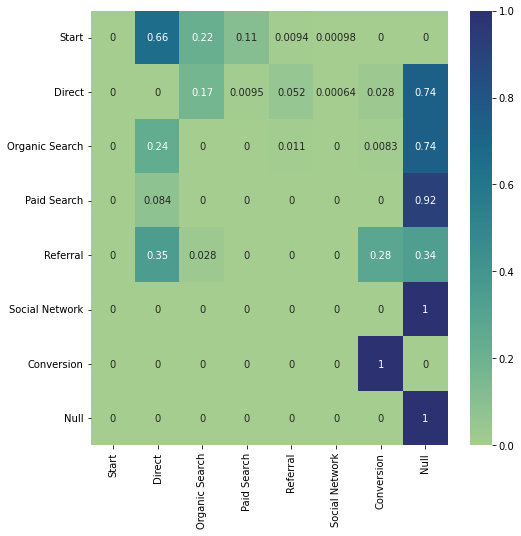

In [ ]:
plt.figure(figsize=(8,8))
TPM_mat=sns.heatmap(TPM_df,cmap='crest',annot=True,xticklabels=states,yticklabels=states)
TPM_mat

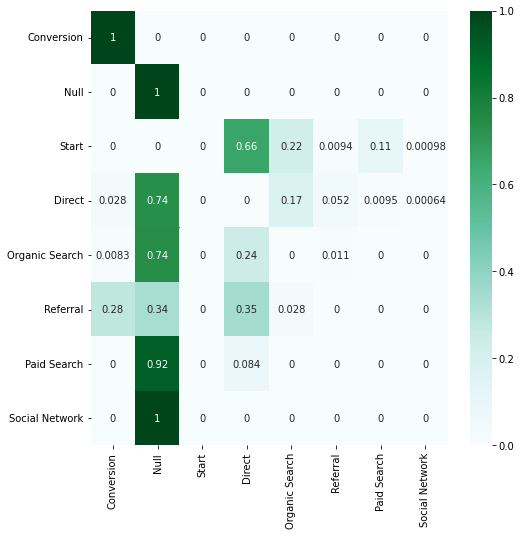

In [ ]:
plt.figure(figsize=(8,8))
TPM_mat1=sns.heatmap(TPM_df1,cmap='BuGn',annot=True,xticklabels=states_r,yticklabels=states_r)
TPM_mat1

In [ ]:
tot_con=sum(strip_paths['Conversion'])
tot_con

81

In [ ]:
tot_vis=sum(strip_paths['All_visits'])
tot_vis

2032

In [ ]:
#conversion rate
con_rate=tot_con/tot_vis
con_rate

0.03986220472440945

In [ ]:
#Required numerator (Removal of Direct)
con_rate*(1-0.87249925)

0.00508246099901575

In [ ]:
#removal of dir,os,ps,sn,ref
not_contain_dir = strip_paths[~strip_paths['path'].str.contains('Direct')]

In [ ]:
not_contain_dir

,path,Conversion,Null_Con,All_visits
8,Start > Organic Search > Referral > Conversion,2,0,2
15,Start > Organic Search > Conversion,3,0,3
16,Start > Referral > Conversion,5,0,5
26,Start > Paid Search > Null,0,11,11
41,Start > Organic Search > Referral > Null,0,2,2
73,Start > Paid Search > Null,0,1,1
151,Start > Organic Search > Null,0,401,401
152,Start > Paid Search > Null,0,194,194
153,Start > Referral > Null,0,7,7
154,Start > Social Network > Null,0,2,2


In [ ]:
strip_paths.to_csv('/content/strip_paths.csv')

#Removal effects function

In [ ]:
def removal_effects(df, conversion_rate):
    removal_effects_dict = {}
    channels = [channel for channel in df.columns if channel not in ['Start',
                                                                     'Null',
                                                                     'Conversion']]
    for channel in channels:
        removal_df = df.drop(channel, axis=1).drop(channel, axis=0)
        for column in removal_df.columns:
            row_sum = np.sum(list(removal_df.loc[column]))
            null_pct = float(1) - row_sum
            if null_pct != 0:
                removal_df.loc[column]['Null'] = null_pct
            removal_df.loc['Null']['Null'] = 1.0

        removal_to_conv = removal_df[
            ['Null', 'Conversion']].drop(['Null', 'Conversion'], axis=0)
        removal_to_non_conv = removal_df.drop(
            ['Null', 'Conversion'], axis=1).drop(['Null', 'Conversion'], axis=0)

        removal_inv_diff = np.linalg.inv(
            np.identity(
                len(removal_to_non_conv.columns)) - np.asarray(removal_to_non_conv))
        removal_dot_prod = np.dot(removal_inv_diff, np.asarray(removal_to_conv))
        removal_cvr = pd.DataFrame(removal_dot_prod,
                                   index=removal_to_conv.index)[[1]].loc['Start'].values[0]
        removal_effect = 1 - removal_cvr / conversion_rate
        removal_effects_dict[channel] = removal_effect

    return removal_effects_dict

In [ ]:
removal_effects_dict = removal_effects(TPM_df1, con_rate)

In [ ]:
removal_effects_dict
#     channel_name removal_effects_conversion removal_effects_conversion_value
# 1         Direct                 0.87249925                      0.837933291
# 2 Organic Search                 0.20095551                      0.247720559
# 3       Referral                 0.39952225                      0.368674826
# 4    Paid Search                 0.01015228                      0.009500083
# 5 Social Network                 0.00000000                      0.000000000

{'Direct': 0.87001159504425,
 'Organic Search': 0.19851920077252327,
 'Referral': 0.3977262605563636,
 'Paid Search': 0.01179389227717087,
 'Social Network': -4.440892098500626e-16}

In [ ]:
def markov_chain_allocations(removal_effects, total_conversions):
    re_sum = np.sum(list(removal_effects.values()))

    return {k: (v / re_sum) * total_conversions for k, v in removal_effects.items()}


attributions = markov_chain_allocations(removal_effects_dict, tot_con)

In [ ]:
attributions
'''channel_name total_conversions total_conversion_value
1         Direct         19.732993             1032.64046
2 Organic Search          6.519558              405.13583
3       Referral         14.085034              633.58514
4    Paid Search          0.662415               37.62858
5 Social Network          0.000000                0.00000'''

'channel_name total_conversions total_conversion_value\n1         Direct         19.732993             1032.64046\n2 Organic Search          6.519558              405.13583\n3       Referral         14.085034              633.58514\n4    Paid Search          0.662415               37.62858\n5 Social Network          0.000000                0.00000'

#Removal Effects

In [ ]:
wo_dir=strip_paths[~strip_paths['path'].str.contains('Direct')]

In [ ]:
wo_dir

,path,Conversion,Null_Con,All_visits
8,Start > Organic Search > Referral > Conversion,2,0,2
15,Start > Organic Search > Conversion,3,0,3
16,Start > Referral > Conversion,5,0,5
26,Start > Paid Search > Null,0,11,11
41,Start > Organic Search > Referral > Null,0,2,2
73,Start > Paid Search > Null,0,1,1
151,Start > Organic Search > Null,0,401,401
152,Start > Paid Search > Null,0,194,194
153,Start > Referral > Null,0,7,7
154,Start > Social Network > Null,0,2,2


In [ ]:
rr_dir=sum(wo_dir['Conversion'])/sum(strip_paths['Conversion'])
rr_dir

0.12345679012345678

In [ ]:
rem_dir=1-rr_dir
rem_dir

0.8765432098765432

In [ ]:
wo_os=strip_paths[~strip_paths['path'].str.contains('Organic Search')]

In [ ]:
rr_os=sum(wo_os['Conversion'])/sum(strip_paths['Conversion'])
rr_os

0.8271604938271605

In [ ]:
rem_os=1-rr_os
rem_os

0.1728395061728395

In [ ]:
wo_ref=strip_paths[~strip_paths['path'].str.contains('Referral')]

In [ ]:
rr_ref=sum(wo_ref['Conversion'])/sum(strip_paths['Conversion'])
rr_ref

0.5925925925925926

In [ ]:
rem_ref=1-rr_ref
rem_ref

0.40740740740740744

In [ ]:
wo_ps=strip_paths[~strip_paths['path'].str.contains('Paid Search')]

In [ ]:
rr_ps=sum(wo_ps['Conversion'])/sum(strip_paths['Conversion'])
rr_ps

1.0

In [ ]:
rem_ps=1-rr_ps
rem_ps

0.0

In [ ]:
wo_s=strip_paths[~strip_paths['path'].str.contains('Social Network')]

In [ ]:
rr_s=sum(wo_s['Conversion'])/sum(strip_paths['Conversion'])
rr_s

1.0

In [ ]:
rem_s=1-rr_s
rem_s

0.0

In [ ]:
rem_vec=['Direct','Organic Search','Referral','Paid Search','Social Network']
rem_vec

['Direct', 'Organic Search', 'Referral', 'Paid Search', 'Social Network']

In [ ]:
removals=pd.DataFrame([rem_dir,rem_os,rem_ref,rem_ps,rem_s],
             rem_vec,columns=['Removal Effects'])
removals

,Removal Effects
Direct,0.876543
Organic Search,0.172840
Referral,0.407407
Paid Search,0.000000
Social Network,0.000000


In [ ]:
total=sum(removals['Removal Effects'])
total

1.4567901234567902

In [ ]:
removals['Share in result']=removals['Removal Effects']/total
removals

,Removal Effects,Share in result
Direct,0.876543,0.601695
Organic Search,0.172840,0.118644
Referral,0.407407,0.279661
Paid Search,0.000000,0.000000
Social Network,0.000000,0.000000


In [ ]:
removals['Conversion Attribution']=removals['Share in result']*tot_con
removals

,Removal Effects,Share in result,Conversion Attribution
Direct,0.876543,0.601695,48.737288
Organic Search,0.172840,0.118644,9.610169
Referral,0.407407,0.279661,22.652542
Paid Search,0.000000,0.000000,0.000000
Social Network,0.000000,0.000000,0.000000


In [ ]:
removals[['Removal Effects','Conversion Attribution']]

,Removal Effects,Conversion Attribution
Direct,0.876543,48.737288
Organic Search,0.172840,9.610169
Referral,0.407407,22.652542
Paid Search,0.000000,0.000000
Social Network,0.000000,0.000000


In [ ]:
pd.DataFrame(removals['Conversion Attribution'])

,Conversion Attribution
Direct,48.737288
Organic Search,9.610169
Referral,22.652542
Paid Search,0.000000
Social Network,0.000000


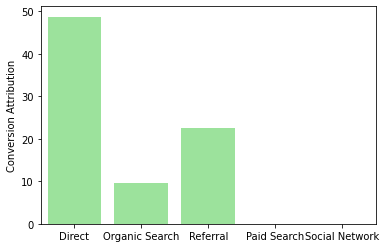

In [ ]:
sns.barplot(x=rem_vec,y=removals['Conversion Attribution'],color='lightgreen')